In [102]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [103]:
# Capture Video
capture = cv2.VideoCapture("C:/Users/vsuch/Downloads/AI Assignment video.mp4")

(1080, 1920, 3)

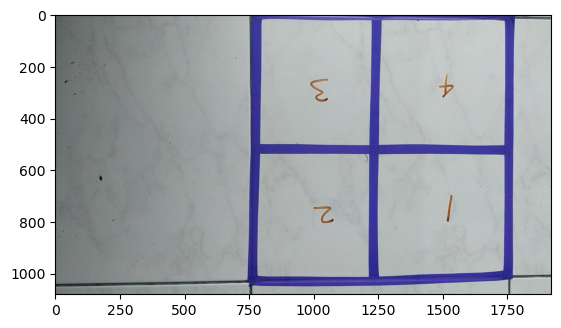

In [104]:
#Testing
nan,frame_instance = capture.read()
plt.imshow(frame_instance)
np.shape(frame_instance)

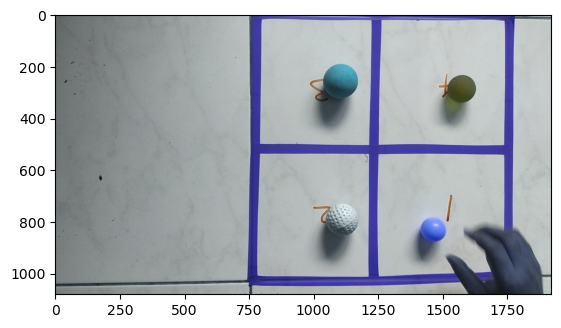

In [39]:
# Not to execute this cell
#Trials for different frames. It captures the nth frame 
#capture.set(cv2.CAP_PROP_POS_FRAMES, 405)
#nan,frame_nth=capture.read()
#cv2.imshow('frame_nth',frame_nth)
#plt.imshow(frame_nth)

In [105]:
Yellow_hsv_min=np.array([112, 100, 100],np.uint8)
Yellow_hsv_max=np.array([124, 255, 255],np.uint8)

#Blue color
Blue_hsv_min=np.array([60,40,40],np.uint8)
Blue_hsv_max=np.array([126,255,255],np.uint8)

#Orange color
Orange_hsv_min=np.array([94, 80, 2],np.uint8)
Orange_hsv_max=np.array([126,255,255],np.uint8)

#Red
Red_hsv_min = np.array([0, 25, 25],np.uint8)
Red_hsv_max = np.array([10, 255,255],np.uint8)
    
#Green color
Green_hsv_min = np.array([36, 40, 40],np.uint8)
Green_hsv_max = np.array([86, 255,255],np.uint8)
    
#White color
White_hsv_min = np.array([0, 0, 255],np.uint8)
White_hsv_max = np.array([255, 255,255],np.uint8) 
#we store color of the ball and timestamps
Color_list=[]
timestamps_list=[]
#Store quadrant number at the time of detection
Quadrant=[]
#These are to be accessed by for loop in the next cell
Color_masks=[Yellow_hsv_min,Yellow_hsv_max,Blue_hsv_min,Blue_hsv_max,Orange_hsv_min,Orange_hsv_max,Red_hsv_min,Red_hsv_max,White_hsv_min,White_hsv_max,Green_hsv_min,Green_hsv_max]
Color=['Yellow','Yellow','Blue','Blue','Orange','Orange','Red','Red','White','White','Green','Green']


In [33]:
len(Color_masks)

12

In [106]:
#Actual execution
while (1):
    nan,frame_instance = capture.read()
    #As camera is fixed, taking advantage of this, im hard cropping the image for Region of Interest (abstract level)
    cropped_image=frame_instance[0:1080,750:1800]
    #Now Im dividing each frame into four quadrants
    h, w, rgb = cropped_image.shape
    #Into Columns
    half = w//2
    left_crop = cropped_image[:, :half]
    right_crop = cropped_image[:, half:]
    h1, w1, rgb = right_crop.shape
    h2, w2, rgb = left_crop.shape
    #Now dividing into Quadrants
    half2 = h1//2
    half3 = h2//2 
    Quadrant_4 = right_crop[:half2, :]
    Quadrant_1 = right_crop[half2:, :]
    Quadrant_3 = left_crop[:half3, :]
    Quadrant_2 = left_crop[half3:, :]
    #Converting to RGB. Without converting to RGB, balls in images are not masking in the quadrants of the frame
    Quadrant_4 = cv2.cvtColor(Quadrant_4, cv2.COLOR_BGR2RGB)
    Quadrant_3 = cv2.cvtColor(Quadrant_3, cv2.COLOR_BGR2RGB)
    Quadrant_2 = cv2.cvtColor(Quadrant_2, cv2.COLOR_BGR2RGB)
    Quadrant_1 = cv2.cvtColor(Quadrant_1, cv2.COLOR_BGR2RGB)
    Quadrants=[Quadrant_1,Quadrant_2,Quadrant_3,Quadrant_4]
    #Mask each quadrant for the color of the ball and check for its presence using Hough circles
    #convert to hsv
    #Mask quadrant 1 with different color masks
    #As I was etting more details, blurring with gaussian mask
    for i in range(0,4):
        hsv_q = cv2.cvtColor(Quadrants[i], cv2.COLOR_BGR2HSV)
        for j in range(0,12,2):
            #Apply color mask
            mask_q = cv2.inRange(hsv_q, Color_masks[j], Color_masks[j+1])
            #the resultant image will be the color of ball with color mask if true
            Resultant_image = cv2.bitwise_and(Quadrants[i], Quadrants[i], mask = mask_q)
            #Now, we find the circle if the resultant image after mask is having the ball
            #To find Hough circles convert to gray
            gray_image = cv2.cvtColor(Resultant_image,cv2.COLOR_RGB2GRAY)
            gray_image = cv2.medianBlur(gray_image,5)
            rows = gray_image.shape[0]
             # if circle is true, then the color and its timestamp is stored
            circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, rows / 8,param1=100, param2=30,minRadius=0, maxRadius=0)
            if np.shape(circles):
            #print("Ball is Blue in color")
                x=capture.get(cv2.CAP_PROP_POS_MSEC)/1000
                timestamps_list.append(x)
                Color_list.append(Color[j])
                Quadrant.append(i+1)
            #else:
                #Quadrant.append('Ball is not present')
                #Color_list.append('Ball is not present')
                #timestamps_list.append(capture.get(cv2.CAP_PROP_POS_MSEC)/1000)
                
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

In [107]:
#Zipping all columns together to create pandas
list_=zip(timestamps_list,Color_list,Quadrant)
import pandas as pd
Log_list=pd.DataFrame(list_,columns=['Timestamp','Color','Quadrant'])

In [108]:
Log_list.to_csv("Log_list_2.csv")

In [101]:
Log_list.tail(15)

,Timestamp,Color,Quadrant
6427,11.882822,Ball is not present,Ball is not present
6428,11.882822,Ball is not present,Ball is not present
6429,11.882822,Ball is not present,Ball is not present
6430,11.882822,Ball is not present,Ball is not present
6431,11.882822,Ball is not present,Ball is not present
6432,11.882822,Ball is not present,Ball is not present
6433,11.882822,Ball is not present,Ball is not present
6434,11.882822,Ball is not present,Ball is not present
6435,11.882822,Ball is not present,Ball is not present
6436,11.916044,Ball is not present,Ball is not present


['Blue', 'Blue', 'Blue']

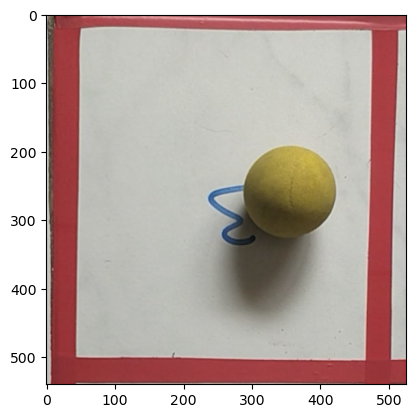